In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("fire_data\SUOMI_VIIRS_C2_Global_VNP14IMGTDL_NRT_2025055.txt", delimiter=",")

In [4]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,52.16934,14.62852,307.09,0.38,0.36,2025-02-24,01:11,N,nominal,2.0NRT,271.06,1.50,N
1,49.47573,23.90888,338.99,0.50,0.49,2025-02-24,01:11,N,nominal,2.0NRT,265.34,4.56,N
2,58.87482,1.51927,353.13,0.34,0.56,2025-02-24,01:11,N,nominal,2.0NRT,279.25,2.36,N
3,52.17022,14.62299,325.91,0.38,0.36,2025-02-24,01:11,N,nominal,2.0NRT,271.40,2.79,N
4,47.87299,33.44717,335.84,0.68,0.74,2025-02-24,01:11,N,nominal,2.0NRT,264.37,7.03,N


c:\Users\cgera\anaconda3\envs\fire\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\cgera\anaconda3\envs\fire\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\cgera\anaconda3\envs\fire\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\cgera\anaconda3\envs\fire\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


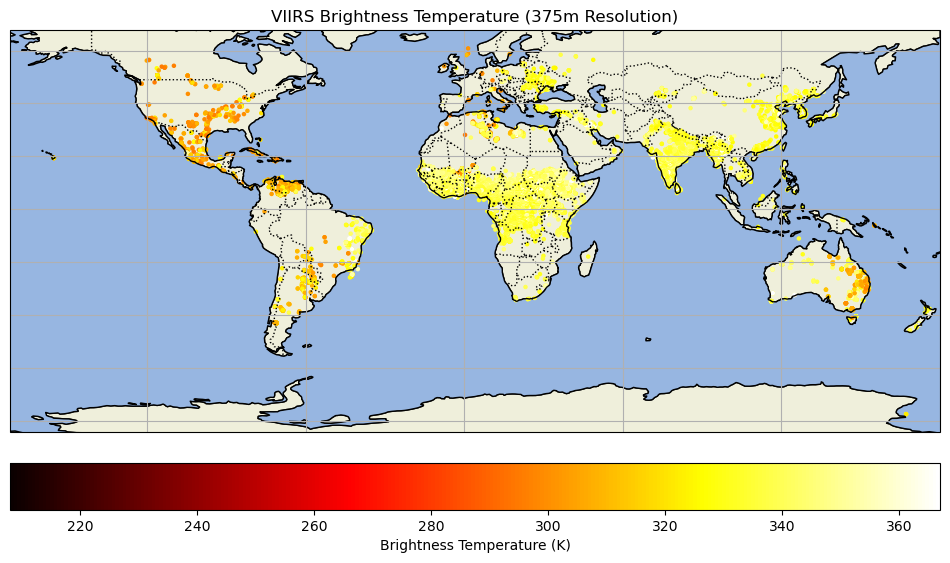

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot with a world map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()

# Plot the points
scatter = ax.scatter(data['longitude'], data['latitude'], c=data['bright_ti4'],
                     cmap='hot', s=5, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.05)
cbar.set_label('Brightness Temperature (K)')

# Set the title
ax.set_title('VIIRS Brightness Temperature (375m Resolution)')

# Show the plot
plt.show()

In [6]:
data = Dataset("fire_data\VJ203MOD.A2025055.1054.002.2025055162045.nc")
data

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: VIIRS M-band Geolocation Data
    platform: JPSS-2
    instrument: VIIRS
    product_name: VJ203MOD.A2025055.1054.002.2025055162045.nc
    LocalGranuleID: VJ203MOD.A2025055.1054.002.2025055162045.nc
    LongName: VIIRS/JPSS2 Moderate Resolution Terrain Corrected Geolocation 6-Min L1 Swath 750m
    ShortName: VJ203MOD
    date_created: 2025-02-24T11:21:05Z
    ProductionTime: 2025-02-24T11:21:05Z
    processing_version: v3.0.0
    Conventions: CF-1.6
    institution: NASA Goddard Space Flight Center, VIIRS L1 Processing Group
    license: http://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.VIIRSland
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    standard_name_vocabulary: 
    creator_name: VIIRS L1 Processing Group
    creator_email: modis-ops@lists.nasa.gov
    creator_url: https://ladsweb.mod

In [8]:
data.groups

{'scan_line_attributes': <class 'netCDF4.Group'>
 group /scan_line_attributes:
     dimensions(sizes): 
     variables(dimensions): float64 scan_start_time(number_of_scans), float64 scan_end_time(number_of_scans), float64 ev_mid_time(number_of_scans), uint8 HAM_side(number_of_scans), uint8 sensor_mode(number_of_scans), int16 scan_quality(number_of_scans)
     groups: ,
 'geolocation_data': <class 'netCDF4.Group'>
 group /geolocation_data:
     dimensions(sizes): 
     variables(dimensions): float32 latitude(number_of_lines, number_of_pixels), float32 longitude(number_of_lines, number_of_pixels), int16 height(number_of_lines, number_of_pixels), int16 range(number_of_lines, number_of_pixels), int16 sensor_azimuth(number_of_lines, number_of_pixels), int16 sensor_zenith(number_of_lines, number_of_pixels), int16 solar_azimuth(number_of_lines, number_of_pixels), int16 solar_zenith(number_of_lines, number_of_pixels), uint8 land_water_mask(number_of_lines, number_of_pixels), uint8 water_presen